This is used to compare the result of PCA and simple RL

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from prettytable import PrettyTable

In [2]:
tsla_data = pd.read_csv('TSLA_data.csv', parse_dates=['Date'], index_col='Date')
sp500_data = pd.read_csv('SP500_data.csv', parse_dates=['Date'], index_col='Date')

data = pd.concat([tsla_data['Close'], sp500_data['Close']], axis=1, keys=['TSLA_Close', 'SP500_Close'])
data.dropna(inplace=True)

X = data[['SP500_Close']]
y = data['TSLA_Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [3]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 34.90
Mean Squared Error (MSE): 1850.76
Root Mean Squared Error (RMSE): 43.02
R-squared (R²): 0.83


In [4]:
table = PrettyTable()
table.field_names = ["Metric", "Value"]

table.add_row(["Mean Absolute Error (MAE)", f"{mae:.4f}"])
table.add_row(["Mean Squared Error (MSE)", f"{mse:.4f}"])
table.add_row(["Root Mean Squared Error (RMSE)", f"{rmse:.4f}"])
table.add_row(["R-squared (R²)", f"{r2:.4f}"])

print(table)

+--------------------------------+-----------+
|             Metric             |   Value   |
+--------------------------------+-----------+
|   Mean Absolute Error (MAE)    |  34.8999  |
|    Mean Squared Error (MSE)    | 1850.7644 |
| Root Mean Squared Error (RMSE) |  43.0205  |
|         R-squared (R²)         |   0.8255  |
+--------------------------------+-----------+


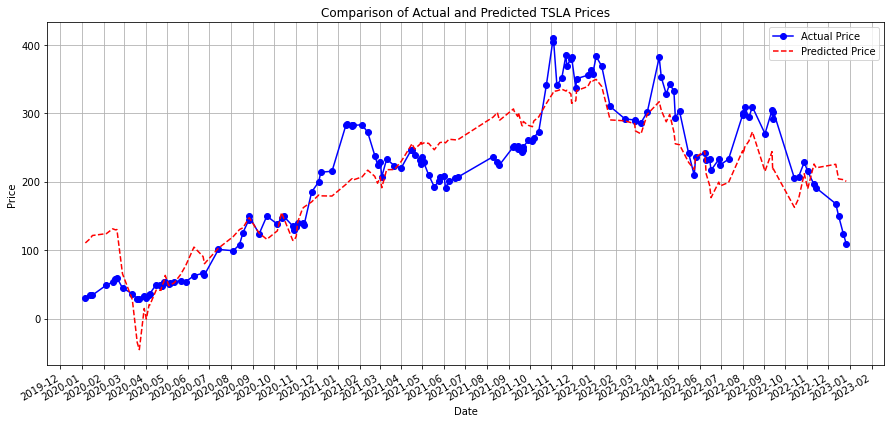

In [5]:
# Create a DataFrame from y_test and y_pred for easier plotting
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Ensure the DataFrame is sorted by date (the index)
comparison_df.sort_index(inplace=True)

# Plotting the actual vs. predicted prices as a time series
plt.figure(figsize=(15, 7))
plt.plot(comparison_df.index, comparison_df['Actual'], label='Actual Price', color='blue', marker='o')
plt.plot(comparison_df.index, comparison_df['Predicted'], label='Predicted Price', color='red', linestyle='--')

# Beautify the x-axis with month locator and formatter
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Ensure the dates on the x-axis are rotated for better readability
plt.gcf().autofmt_xdate()

plt.title('Comparison of Actual and Predicted TSLA Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()